## Spectrogram

In [117]:
import torchaudio

file_data = torchaudio.load('yesterday.wav')
y = file_data[0] # waveform sample 
sr = file_data[1]  # sampling rate of file

# ==
y, sr = torchaudio.load('yesterday.wav')

In [123]:
def my_fn():
  
  return 0, 5, 3, 4

dummy = my_fn()
a,b,c,d = my_fn()

print(a, b, c, d)
a
b
c
d


0 5 3 4


4

In [ ]:
import IPython.display as ipd

ipd.display(ipd.Audio(y, rate=sr))
sr

In [6]:
y.shape

torch.Size([2, 8267776])

In [ ]:
y_left = y[0]
y_right = y[1]
ipd.display(ipd.Audio(y_left, rate=sr))
ipd.display(ipd.Audio(y_right, rate=sr))


In [ ]:
ipd.Audio(y_left + y_right, rate=sr)

In [13]:
import torch
y_mono = (y_left + y_right)/2

In [ ]:
y_mono = y.mean(dim=0)
# y_mono.shape
ipd.Audio(y_mono, rate= sr)

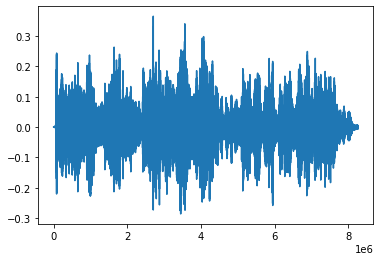

In [17]:
import matplotlib.pyplot as plt
plt.plot(y_mono)

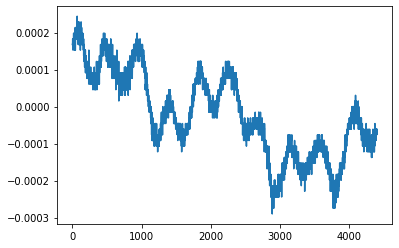

In [21]:
plt.plot(y_mono[4400:8800])

In [37]:
# torchaudio에서 spectrogram 만드는 법

# functional
spec = torchaudio.functional.spectrogram(y_mono, n_fft=2048, 
                                         hop_length=1024, 
                                         pad=0, 
                                         win_length=2048,
                                         power=True,
                                         normalized=True,
                                         window = torch.hann_window(2048)
                                        )

# Class
spec_converter = torchaudio.transforms.Spectrogram(n_fft=2048,
                                                  )
spec = spec_converter(y_mono)

In [41]:
y_clip = y_mono[5*sr:10*sr]
ipd.Audio(y_clip, rate=sr)



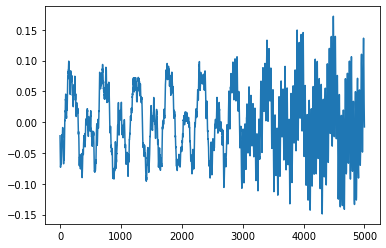

In [44]:
plt.plot(y_clip[:5000])

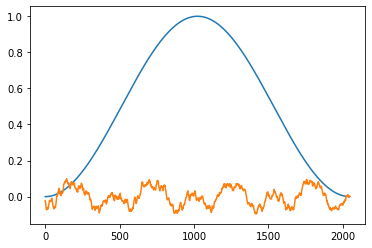

In [49]:
window_tensor = torch.hann_window(2048)
window_tensor
plt.plot(window_tensor)
plt.plot(sample_slice)

In [65]:
def rect_window(win_size):
  return torch.ones(win_size)

single_spec_converter = torchaudio.transforms.Spectrogram(n_fft=2048,
                                                          hop_length=2048,
                                                         center=False,
                                                          window_fn=rect_window
                                                    )

torch.Size([1025, 1])

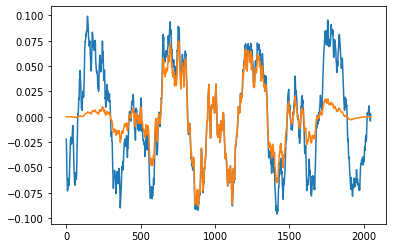

In [66]:
n_fft = 2048
window_tensor = torch.hann_window(2048)
sample_slice = y_clip[0:n_fft]
windowed_slice = sample_slice * window_tensor
plt.plot(sample_slice)
plt.plot(windowed_slice)

fft_result = single_spec_converter(windowed_slice)
fft_result.shape

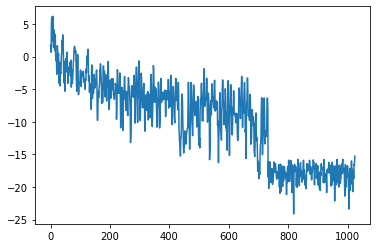

In [68]:
plt.plot(torch.log(fft_result))

In [ ]:
# center==True:
'''
center==True일때

0번째 hop window의 중심 샘플 =  0*hop_length
1번째 hop window의 중심 샘플 = 1*hop_length

center==False

0번째 hop window의 첫 샘플 = 0 * hop_length

'''

In [116]:
2048 

512.0

In [103]:
n_fft = 2048 // 4
window_tensor = torch.hann_window(n_fft)
hop_length = 512 // 4

single_spec_converter = torchaudio.transforms.Spectrogram(n_fft=n_fft,
                                                          hop_length=n_fft,
                                                         center=False,
                                                          window_fn=rect_window
                                                    )

total_result = []
for hop_start in range(0, len(y_clip)-n_fft, hop_length):
  sample_slice = y_clip[hop_start:hop_start+n_fft]
  windowed_slice = sample_slice * window_tensor

  fft_result = single_spec_converter(windowed_slice) # windowed_slice에 FFT 연산 실행
  total_result.append(fft_result)

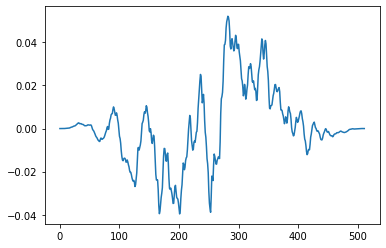

In [104]:
plt.plot(windowed_slice)

In [105]:
ipd.Audio(windowed_slice, rate=sr)

In [106]:
total_result[0].shape

torch.Size([257, 1])

In [107]:
total_spec = torch.cat(total_result, dim=1)
total_spec.shape

torch.Size([257, 1719])

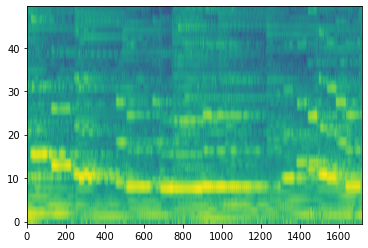

In [129]:
plt.imshow(torch.log(total_spec[:50]), origin='lower', aspect='auto')

In [87]:
ipd.Audio(y_clip, rate=sr)

In [38]:
spec.shape

torch.Size([1025, 8075])

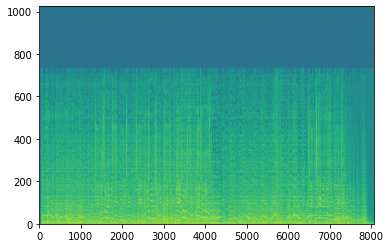

In [39]:
plt.imshow(torch.log(spec), aspect='auto', origin='lower')

## Mel Scale

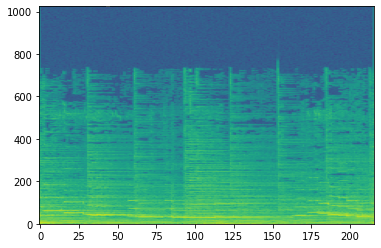

In [127]:
spec_converter = torchaudio.transforms.Spectrogram(n_fft=2048,
                                                  )
spec = spec_converter(y_clip)
plt.imshow(torch.log(spec), aspect='auto', origin='lower')

In [132]:
mel_scale = torchaudio.transforms.MelScale(n_mels=80, 
                                           sample_rate=44100, 
                                           f_min=20, 
                                           f_max=8000, 
                                           n_stft=spec.shape[0])


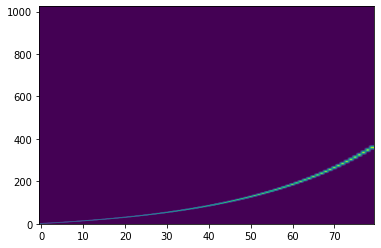

In [135]:
plt.imshow(mel_scale.fb, aspect='auto', origin='lower')

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2421, 0.7579,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])

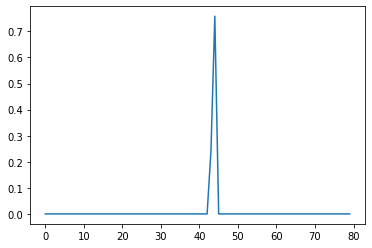

In [137]:
plt.plot(mel_scale.fb[100])
mel_scale.fb[100]

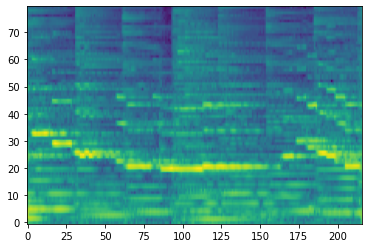

In [140]:
mel_spec = mel_scale(spec)
plt.imshow(torch.log(mel_spec), origin='lower', aspect='auto')

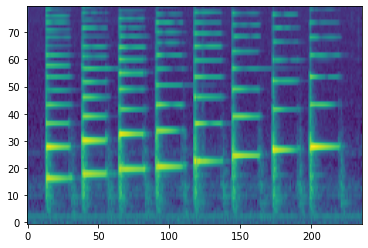

In [143]:
y, sr = torchaudio.load("piano_scale.wav")
y_clip = y[0]

spec = spec_converter(y_clip)
mel_spec = mel_scale(spec)
plt.imshow(torch.log(mel_spec), aspect='auto', origin='lower')

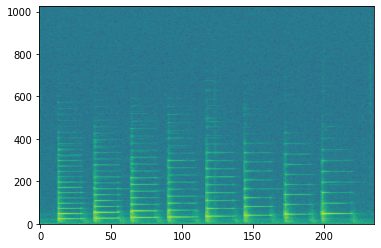

In [144]:
plt.imshow(torch.log(spec), aspect='auto', origin='lower')

### Mel Spectrogram

## Neural Network with simple toy example

In [2]:
from math import pi 
def make_sine_wave(pitch, amplitude, duration, sampling_rate):
  return torch.sin(torch.arange(sampling_rate*duration)/sampling_rate * pitch * 2 * pi) * amplitude

pitch_list = list(range(400, 1500, 100))
pitch_list

[400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400]

In [3]:
import torch
import random
duration = 2
SR = 16000

total_data = []
for pitch in pitch_list:
  pitch_wave = []
  for i in range(100):
    amplitude = random.random() ** 3
    sine_wave = make_sine_wave(pitch, amplitude, duration, SR)
    white_noise = torch.rand(SR*duration) * 2 -1
    sine_wave += white_noise * random.random() ** 2
    pitch_wave.append(sine_wave)
  pitch_wave = torch.stack(pitch_wave)
  print(pitch_wave.shape)
  total_data.append(pitch_wave)
#   ipd.display(ipd.Audio(sine_wave, rate=SR))

torch.Size([100, 32000])
torch.Size([100, 32000])
torch.Size([100, 32000])
torch.Size([100, 32000])
torch.Size([100, 32000])
torch.Size([100, 32000])
torch.Size([100, 32000])
torch.Size([100, 32000])
torch.Size([100, 32000])
torch.Size([100, 32000])
torch.Size([100, 32000])


In [4]:
total_tensor = torch.stack(total_data)
total_tensor.shape

torch.Size([11, 100, 32000])

In [5]:
import torchaudio
spec_converter = torchaudio.transforms.Spectrogram(n_fft=1024)

total_spec = spec_converter(total_tensor)

In [6]:
total_spec.shape

torch.Size([11, 100, 513, 63])

In [8]:
# 4번째 pitch의 17번째 (100개 중) 사인 오디오 샘플의 스펙트로그램
total_spec[4, 17]

tensor([[186.9772,   8.8150, 108.9733,  ..., 128.9617,  54.6399, 128.9639],
        [344.4840,  80.5852, 223.0289,  ...,  45.8162, 140.1104,  47.6281],
        [213.2507,  56.0919, 126.4620,  ...,  19.0630,  22.7598, 169.2285],
        ...,
        [ 19.8191, 118.4851,   7.5251,  ...,  28.1769,  20.3124, 129.1497],
        [ 24.3766,  46.1853,  28.5325,  ...,  26.0586,  40.8823, 206.3067],
        [105.7096,   1.9941,  41.1937,  ...,   3.9400,  55.3269, 232.5594]])

In [180]:
total_spec[:, 24, :,43]



tensor([[1.4084e-02, 2.3542e-02, 2.1159e-02,  ..., 8.5506e-04, 1.0079e-02,
         4.0907e-03],
        [6.2371e-03, 3.4754e-03, 4.2632e-04,  ..., 2.4246e-03, 1.8092e-04,
         1.0181e-04],
        [1.3862e+01, 8.9451e+01, 1.8162e+02,  ..., 1.0530e+01, 1.0004e+02,
         4.6626e-01],
        ...,
        [1.2587e-02, 5.3962e-02, 9.9916e-02,  ..., 1.7968e-01, 3.8161e-02,
         1.3735e-02],
        [2.5341e+00, 1.3885e+00, 2.6596e+00,  ..., 1.2613e+00, 7.6258e+00,
         8.2205e+00],
        [2.4714e-05, 7.8896e-06, 1.8717e-06,  ..., 8.5099e-05, 2.8315e-05,
         2.2289e-06]])

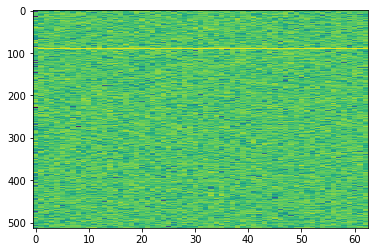

In [10]:
import matplotlib.pyplot as plt
plt.imshow(torch.log(total_spec[10, 70]), aspect='auto', interpolation='nearest')

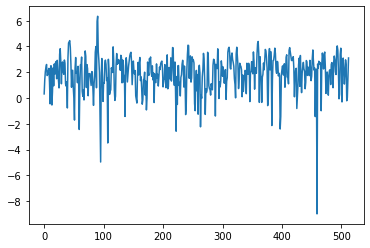

In [11]:
plt.plot(torch.log(total_spec[10, 70, :, 30])) # 10번째 pitch 샘플의 70번째 사인 오디오 샘플의 전체 프리퀀시 bin, 30번째 time bin

In [57]:
import torch.nn as nn
model = torch.randn(513, 11, requires_grad=True) / 513
# model = nn.Linear
model

tensor([[-2.1410e-03, -2.7041e-03, -8.3701e-04,  ..., -7.1960e-04,
         -2.6190e-04, -1.0616e-03],
        [-2.6389e-03,  4.5267e-03, -1.0515e-03,  ...,  1.2083e-03,
          6.7244e-05, -2.3976e-03],
        [ 2.2611e-04, -2.2220e-03,  2.9739e-03,  ...,  2.2350e-03,
          2.5485e-03,  4.9227e-04],
        ...,
        [ 1.1353e-03,  4.2275e-04,  2.7223e-04,  ...,  7.0898e-04,
          1.2002e-03,  1.8010e-03],
        [ 2.1866e-03, -2.3936e-03,  7.1931e-04,  ..., -1.2266e-03,
          7.6593e-04,  3.7851e-04],
        [ 1.6094e-03,  1.4666e-03,  2.2533e-03,  ...,  1.9684e-03,
         -3.6737e-03,  4.0153e-04]], grad_fn=<DivBackward0>)

In [28]:
model[0, 5] # 0번째 frequency bin에 대한 5번째 뉴런의 weight

tensor(0.0020, grad_fn=<SelectBackward0>)

In [18]:
log_spec = torch.log(total_spec + 1e-6)

In [19]:
log_spec.shape

torch.Size([11, 100, 513, 63])

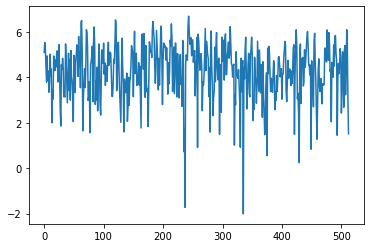

In [21]:
'''
0번째 pitch의 5번째 sine sample의 전체 frequency bin, 30번째 time bin
'''
input_tensor = log_spec[0, 5, :, 30]
plt.plot(input_tensor)

In [22]:
input_tensor.shape, model.shape

(torch.Size([513]), torch.Size([513, 11]))

In [33]:
output = torch.matmul(input_tensor, model)
output

tensor([ 0.1322,  0.0007, -0.4993,  0.1723, -0.1698,  0.1317,  0.1596, -0.1473,
         0.0195,  0.2239,  0.1031], grad_fn=<SqueezeBackward3>)

In [30]:
torch.softmax(output, dim=0)

tensor([0.1007, 0.0883, 0.0535, 0.1048, 0.0744, 0.1006, 0.1035, 0.0761, 0.0899,
        0.1103, 0.0978], grad_fn=<SoftmaxBackward0>)

In [32]:
# def softmax(atensor, dim):

exponential_value = torch.exp(output)
exponential_value

tensor([1.1413, 1.0007, 0.6069, 1.1880, 0.8439, 1.1408, 1.1731, 0.8630, 1.0197,
        1.2509, 1.1085], grad_fn=<ExpBackward0>)

In [34]:
exponential_value.sum()

tensor(11.3369, grad_fn=<SumBackward0>)

In [35]:
# softmax result
exponential_value / exponential_value.sum()

tensor([0.1007, 0.0883, 0.0535, 0.1048, 0.0744, 0.1006, 0.1035, 0.0761, 0.0899,
        0.1103, 0.0978], grad_fn=<DivBackward0>)

In [40]:
softmax_result = torch.softmax(output, dim=0)
softmax_result 

tensor([0.1007, 0.0883, 0.0535, 0.1048, 0.0744, 0.1006, 0.1035, 0.0761, 0.0899,
        0.1103, 0.0978], grad_fn=<SoftmaxBackward0>)

In [42]:
target_class_prob = softmax_result[0]
target_class_prob  # 1에 가까워져야함

tensor(0.1007, grad_fn=<SelectBackward0>)

In [54]:
loss = -torch.log(target_class_prob+1e-6)
loss

tensor(2.2958, grad_fn=<NegBackward0>)

In [55]:
loss.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [79]:
model = nn.Linear(513, 11)

def run_model(model, input_tensor, label_idx):
  output = torch.matmul(input_tensor, model.weight.T)
  softmax_result = torch.softmax(output, dim=0)
  loss = -torch.log(softmax_result[label_idx]+1e-6)
  return loss

def update_parameters(model, lr=0.001):
  model.weight.data -= model.weight.grad * lr # update model parameter
  model.weight.grad = None
  

# loss = run_model(model, input_tensor, 0)
# loss.backward()
# update_parameters(model)

In [80]:
loss = run_model(model, input_tensor, 0)
print(loss)
loss.backward()
update_parameters(model)
loss = run_model(model, input_tensor, 0)
print(loss)

tensor(4.9108, grad_fn=<NegBackward0>)
tensor(0.0008, grad_fn=<NegBackward0>)


In [83]:
torch.set_printoptions(sci_mode=False)
torch.softmax(model(input_tensor), dim=0)

tensor([    0.9992,     0.0001,     0.0000,     0.0001,     0.0000,     0.0002,
            0.0002,     0.0002,     0.0000,     0.0000,     0.0000],
       grad_fn=<SoftmaxBackward0>)

In [91]:
def get_input_tensor(pitch):
  sample_idx = random.randint(0, 99)
  input_tensor = log_spec[pitch, sample_idx, :, 30]
  return input_tensor

pitch_id = 5
input_tensor = get_input_tensor(pitch_id)
run_model(model, input_tensor, pitch_id)

tensor(5.8110, grad_fn=<NegBackward0>)

In [137]:
loss_record = []
model = nn.Linear(513, 11)
for i in range(5000):
  for pitch in range(11):
    input_tensor = get_input_tensor(pitch)
    loss = run_model(model, input_tensor, pitch)
    loss.backward()
    update_parameters(model, lr=1e-4)
    loss_record.append(loss.item())

In [117]:
loss

tensor(0.3120, grad_fn=<NegBackward0>)

In [136]:
'''
What is nn.Linear()
'''
# torch.manual_seed(0)
sample_linear = nn.Linear(12, 5)
sample_linear.weight, sample_linear.bias

sample_input = torch.arange(12).float()

output_a = sample_linear(sample_input)
output_b = torch.matmul(sample_input, sample_linear.weight.T)

output_a, output_b, sample_linear.bias

(tensor([ 2.9062,  4.1002, -1.0555, -2.5512,  9.5311], grad_fn=<AddBackward0>),
 tensor([ 2.6176,  3.9505, -1.2349, -2.4501,  9.3926],
        grad_fn=<SqueezeBackward3>),
 Parameter containing:
 tensor([ 0.2886,  0.1497,  0.1795, -0.1010,  0.1385], requires_grad=True))

In [126]:
sample_linear.bias

Parameter containing:
tensor([-0.1711, -0.0723, -0.1406, -0.1010, -0.2366], requires_grad=True)

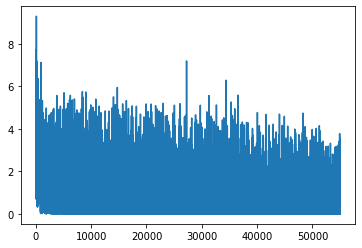

In [138]:
plt.plot(loss_record)

In [139]:
model.weight, model.bias

(Parameter containing:
 tensor([[-0.0162, -0.0102, -0.0360,  ...,  0.0484,  0.0488,  0.0527],
         [-0.0163,  0.0028,  0.0071,  ...,  0.0026, -0.0063, -0.0816],
         [ 0.0086, -0.0319, -0.0241,  ...,  0.0020, -0.0114, -0.0292],
         ...,
         [-0.0139, -0.0218, -0.0209,  ..., -0.0383,  0.0515,  0.0138],
         [-0.0193,  0.0215,  0.0272,  ..., -0.0067, -0.0001,  0.0714],
         [-0.0199,  0.0417, -0.0374,  ...,  0.0578, -0.0375, -0.0002]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0340,  0.0160,  0.0405,  0.0103,  0.0160,  0.0272,  0.0288,  0.0242,
         -0.0346,  0.0128, -0.0302], requires_grad=True))

In [141]:
model.weight.shape

torch.Size([11, 513])

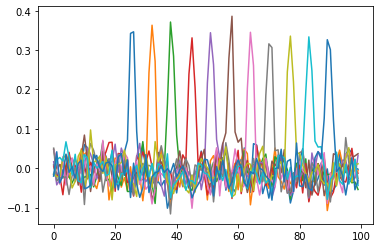

In [146]:
# Weight visualization
for i in range(11):
  plt.plot(model.weight[i,:100].detach())

In [148]:
log_spec.shape

torch.Size([11, 100, 513, 63])

In [151]:
torch.log(torch.zeros(1)+1e-7)

tensor([-16.1181])

In [72]:
model.weight.shape, model.weight.grad.shape

(torch.Size([11, 513]), torch.Size([11, 513]))

In [74]:
model.weight.grad

tensor([[-4.7225e+00, -5.1280e+00, -4.8810e+00,  ..., -4.9156e+00,
         -2.7836e+00, -1.4006e+00],
        [ 1.5086e-01,  1.6382e-01,  1.5593e-01,  ...,  1.5703e-01,
          8.8924e-02,  4.4743e-02],
        [ 2.7757e+00,  3.0140e+00,  2.8688e+00,  ...,  2.8891e+00,
          1.6361e+00,  8.2319e-01],
        ...,
        [ 1.6231e+00,  1.7625e+00,  1.6776e+00,  ...,  1.6895e+00,
          9.5670e-01,  4.8137e-01],
        [ 5.8495e-03,  6.3517e-03,  6.0458e-03,  ...,  6.0887e-03,
          3.4479e-03,  1.7348e-03],
        [ 9.3064e-04,  1.0105e-03,  9.6187e-04,  ...,  9.6869e-04,
          5.4855e-04,  2.7600e-04]])

In [198]:
full_converter = torchaudio.transforms.Spectrogram(onesided=False)
spec = full_converter(y_clip)

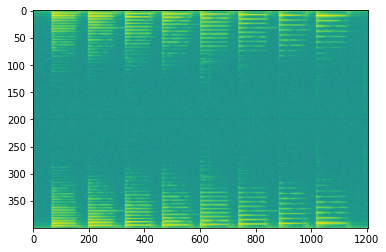

In [199]:
plt.imshow(torch.log(spec), aspect='auto')

In [196]:
1e-7

1e-07

In [187]:
pitch_list

[400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400]

In [164]:
white_noise = torch.rand(SR*duration) * 2 -1
ipd.Audio(white_noise, rate=SR)

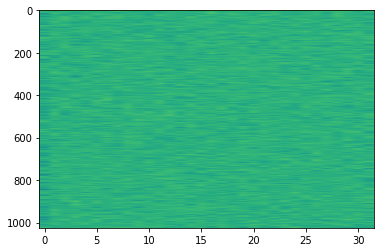

In [163]:
plt.imshow(spec_converter(white_noise).log(), aspect='auto')

In [157]:
sine_wave

tensor([ 0.0000,  0.0447,  0.0884,  ..., -0.1298, -0.0884, -0.0446])